In [9]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import KBinsDiscretizer

airbnb_data = pd.read_csv('xlsx-csv/NYAirbnb/AB_NYC_2019.csv')
# updated_data = airbnb_data[['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'number_of_reviews']]
# updated_data = pd.get_dummies(updated_data)

In [23]:
from sklearn.preprocessing import label_binarize
X = airbnb_data[['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price']]
print(type(X))
# convert categorigcal variables to numeric via one-hot encoding
#X = pd.get_dummies(X)
# divide number_of_reviews into bins to get different classifications
# airbnb_data['reviews_bins'] = pd.qcut(x=airbnb_data['number_of_reviews'], q=4, labels=['0-1', '2-5', '6-24', '25-629'])
# airbnb_data['reviews_bins'] = numpy.array_split(ary = airbnb_data['number_of_reviews'], indices_or_sections=5)
airbnb_data['reviews_bins'] = pd.cut(x=airbnb_data['number_of_reviews'], bins=[-1, 100, 200, 300, 400, 500, 650], labels=[0, 1, 2, 3, 4, 5])
y = airbnb_data.reviews_bins
y = label_binarize(y, classes=[0,1,2,3,4,5])
n_classes = 6
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(airbnb_data.number_of_reviews.values)

print(X)
print(y)
# print(airbnb_data.iloc[264,:])

<class 'pandas.core.frame.DataFrame'>
             id   host_id neighbourhood_group       neighbourhood  \
0          2539      2787            Brooklyn          Kensington   
1          2595      2845           Manhattan             Midtown   
2          3647      4632           Manhattan              Harlem   
3          3831      4869            Brooklyn        Clinton Hill   
4          5022      7192           Manhattan         East Harlem   
...         ...       ...                 ...                 ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant   
48891  36485057   6570630            Brooklyn            Bushwick   
48892  36485431  23492952           Manhattan              Harlem   
48893  36485609  30985759           Manhattan      Hell's Kitchen   
48894  36487245  68119814           Manhattan      Hell's Kitchen   

             room_type  price  
0         Private room    149  
1      Entire home/apt    225  
2         Private room    150  
3    

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)
DTree = DecisionTreeClassifier(min_samples_split=1000)
DTree.fit(X_train, y_train)
y_pred = DTree.predict(X_test)

print('Accuracy Score using Decision Tree:', accuracy_score(y_true=y_test, y_pred=y_pred))
print('Confusion Matrix of test data: \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('Decision Tree Classification report:\n\n', classification_report(y_true=y_test, y_pred=y_pred))

Accuracy Score using Decision Tree: 0.9369273560209425
Confusion Matrix of test data: 
 [[11451    19     1     0     4     0]
 [  605     2     1     0     0     0]
 [  115     0     0     0     0     0]
 [   18     0     0     0     0     0]
 [    7     0     0     0     0     0]
 [    1     0     0     0     0     0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classification report:

               precision    recall  f1-score   support

       0-100       0.94      1.00      0.97     11475
     101-200       0.10      0.00      0.01       608
     201-300       0.00      0.00      0.00       115
     301-400       0.00      0.00      0.00        18
     401-500       0.00      0.00      0.00         7
     501-650       0.00      0.00      0.00         1

    accuracy                           0.94     12224
   macro avg       0.17      0.17      0.16     12224
weighted avg       0.89      0.94      0.91     12224



In [119]:
# df_list = np.vsplit(updated_data, 5)
# training_data = pd.concat(df_list[0:3])
# # print('training data: \n',training_data)
# y = training_data['number_of_reviews']
# y_train = pd.cut(x=y, bins=[-1, 100, 200, 300, 400, 500, 650], labels=['0-100', '101-200', '201-300', '301-400', '401-500', '501-650'])
# X_train = training_data.loc[:, training_data.columns != 'number_of_reviews']
# print('\n y train: \n', y_train)
# test_data = df_list[4]
# # print('\n test data: \n',test_data)
# y2 = test_data['number_of_reviews']
# y_test = pd.cut(x=y2, bins=[-1, 100, 200, 300, 400, 500, 650], labels=['0-100', '101-200', '201-300', '301-400', '401-500', '501-650'])
# X_test = test_data.loc[:, test_data.columns != 'number_of_reviews']
# print('\n y test: \n', y_test)
# DecTree = DecisionTreeClassifier()
# DecTree.fit(X_train, y_train)
# y_pred = DecTree.predict(X_test)

# print('Accuracy Score using Decision Tree:', accuracy_score(y_true=y_test, y_pred=y_pred))
# print('Confusion Matrix of test data: \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
# print('Decision Tree Classification report:\n\n', classification_report(y_true=y_test, y_pred=y_pred))


 y train: 
 0          0-100
1          0-100
2          0-100
3        201-300
4          0-100
          ...   
29332      0-100
29333      0-100
29334      0-100
29335      0-100
29336      0-100
Name: number_of_reviews, Length: 29337, dtype: category
Categories (6, object): [0-100 < 101-200 < 201-300 < 301-400 < 401-500 < 501-650]

 y test: 
 39116    0-100
39117    0-100
39118    0-100
39119    0-100
39120    0-100
         ...  
48890    0-100
48891    0-100
48892    0-100
48893    0-100
48894    0-100
Name: number_of_reviews, Length: 9779, dtype: category
Categories (6, object): [0-100 < 101-200 < 201-300 < 301-400 < 401-500 < 501-650]


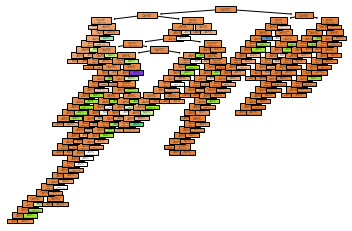

In [142]:
plot_tree(DTree, filled=True)
plt.show()

In [24]:
# generate a random prediction (majority class)
print(y_test)
ns_probs = [0 for _ in range(len(y_test))]
clf = MLPClassifier(random_state=0)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
lr_probs = clf.predict_proba(X_test)
y_test = clf.predict_proba(y_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(y_test, ns_probs)
# calculate accuracy score MLP model
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Baseline (random guess): ROC AUC=%.3f' % (ns_auc))
print('MLP: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='MLP')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

23852      0-100
9526       0-100
2767     101-200
16288    101-200
39899      0-100
          ...   
34237      0-100
39615      0-100
45126      0-100
40642      0-100
31042      0-100
Name: reviews_bins, Length: 12224, dtype: category
Categories (6, object): [0-100 < 101-200 < 201-300 < 301-400 < 401-500 < 501-650]


ValueError: could not convert string to float: '0-100'

In [7]:
# clf2 = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,), max_iter=1000)
# clf2.fit(X_train, y_train)
# clf2_predict = clf2.predict(X_test)
# print('Accuracy Score using MLP with 10 hidden layers:', clf2.score(X_test, y_test))
# print('MLP Classification report:\n\n', classification_report(y_test, clf2_predict))

Accuracy Score using MLP with 10 hidden layers: 0.9387270942408377


c:\users\namra\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classification report:

               precision    recall  f1-score   support

       0-100       0.94      1.00      0.97     11475
     101-200       0.00      0.00      0.00       608
     201-300       0.00      0.00      0.00       115
     301-400       0.00      0.00      0.00        18
     401-500       0.00      0.00      0.00         7
     501-650       0.00      0.00      0.00         1

    accuracy                           0.94     12224
   macro avg       0.16      0.17      0.16     12224
weighted avg       0.88      0.94      0.91     12224



In [18]:
# generate a random prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs1 = clf.predict_proba(X_test)
lr_probs2 = clf2.predict_proba(X_test)
print('probabilities: \n', lr_probs1)
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
lr_probs2 = lr_probs2[:, 1]
print('prob for +ve outcomes: \n', lr_probs1)

probabilities: 
 [[9.38721141e-01 4.77098220e-02 1.04717306e-02 1.99792162e-03
  7.79101916e-04 3.20283231e-04]
 [9.38721141e-01 4.77098220e-02 1.04717306e-02 1.99792162e-03
  7.79101916e-04 3.20283231e-04]
 [9.38721141e-01 4.77098220e-02 1.04717306e-02 1.99792162e-03
  7.79101916e-04 3.20283231e-04]
 ...
 [9.38721141e-01 4.77098220e-02 1.04717306e-02 1.99792162e-03
  7.79101916e-04 3.20283231e-04]
 [9.38721141e-01 4.77098220e-02 1.04717306e-02 1.99792162e-03
  7.79101916e-04 3.20283231e-04]
 [9.38721141e-01 4.77098220e-02 1.04717306e-02 1.99792162e-03
  7.79101916e-04 3.20283231e-04]]
prob for +ve outcomes: 
 [0.04770982 0.04770982 0.04770982 ... 0.04770982 0.04770982 0.04770982]


In [19]:
print(y_test)
# calculate accuracy score for random prediction model
ns_auc = roc_auc_score(y_test, ns_probs, average='weighted')

# calculate accuracy score different MLP models
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lr_auc2 = roc_auc_score(y_test, lr_probs2)

23852    1
9526     1
2767     2
16288    2
39899    1
        ..
34237    1
39615    1
45126    1
40642    1
31042    1
Name: reviews_bins, Length: 12224, dtype: category
Categories (6, object): [1 < 2 < 3 < 4 < 5 < 6]


ValueError: multi_class must be in ('ovo', 'ovr')